# Ecuaciones de una variable

In [1]:
#import some useful packages and some stylish
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *
plt.style.use('seaborn')
#%matplotlib inline #ejecutar esta línea cuando se trabaje en un servidor jupyter
pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos

## MÉTODOS
### Método de gráfico
#### Grafica de funciones
def graficar(f, x_i, x_f, int = 1000):
    fig, ax = plt.subplots()
    x = np.linspace(x_i, x_f, int)
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle='-')
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()

def graficar_pf(f, x_i, x_f, int = 1000):
    fig, ax = plt.subplots()
    x = np.linspace(x_i, x_f, int)
    ax.plot(x, f(x))
    ax.plot(x, x)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle='-')
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()

### Método de bisección
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de biseccion.
'''
---
#### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		Si f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia - número
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
#### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor medio del N-esimo intervalo calculado en el metodo de bissecion.
		El intervalo inicial [a_0,b_0] es dado por [a,b]. Si f(m_n) == 0 para algún valor
		medio m_n = (a_n + b_n)/2, entonces la funcion regresa esa solución. Si todos los
		signos de los valores de f(a_n), f(b_n) y f(m_n) son iguales en cualquier iteracion,
		entonces el metodo de biseccion falla y no devuelve nada.
'''
def met_biseccion(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    a_n = a
    b_n = b
    x_n = (a_n + b_n) / 2  # punto medio x_0
    error = abs(b_n - a_n)/2
    lista=[[n, a_n, b_n, x_n, f(x_n), None]] #agrega el dato a la lista
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
        else:
            a_n = x_n
        error = abs(b_n - a_n)/2
        x_n = (a_n + b_n) / 2
        n += 1
        lista.append([n,a_n, b_n, x_n, f(x_n), error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)', 'error']).set_index('n')
    return tabla, x_n

### Método de _regula falsi_
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de la posición falsa.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor donde corta la recta que pasa por los puntos (a,f(a)) y (b,f(b))
'''
def met_regulafalsi(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    x_n = b-(f(b)*(b-a))/(f(b)-f(a)) # falsa posición
    a_n = a
    b_n = b
    error = 1
    lista=[[n, a_n, b_n, x_n, f(x_n), None]] #agrega el dato a la lista
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
        else:
            a_n = x_n
        x_o = x_n
        x_n = b_n-(f(b_n)*(b_n-a_n))/(f(b_n)-f(a_n))
        error = abs(x_o - x_n)
        n += 1
        lista.append([n,a_n, b_n, x_n, f(x_n),error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)',
                                         'error_abs']).set_index('n')
    return tabla, x_n

#---
def met_merge_b_rf(f, a_n, b_n, tol, n = 100):
    if f(a_n) * f(b_n) > 0:
        print("El metodo de proporcion falló.")
        return None, None
    n_n = 0
    c_n_b = (a_n + b_n) / 2
    c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
    toggle = None
    c_n = None
    error_abs = None

    if abs(f(c_n_b)) > abs(f(c_n_rf)):
        toggle = False
        c_n = c_n_rf
        error_abs = 1
        print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
    else:
        toggle = True
        c_n = c_n_b
        error_abs = abs(a_n - b_n)
        print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    lista = [[n_n, a_n, b_n, c_n, f(c_n), error_abs]]

    while error_abs > tol and f(c_n) != 0 and n_n < n:
        if f(a_n) * f(c_n) <= 0:
            b_n = c_n
        elif f(c_n) * f(b_n) <= 0:
            a_n = c_n

        n_n += 1
        c_n_b = (a_n + b_n) / 2
        c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
        lista.append([n_n, a_n, b_n, c_n, f(c_n), error_abs])

        if abs(f(c_n_b)) > abs(f(c_n_rf)):
            toggle = False
            c_o = c_n
            c_n = c_n_rf
            error_abs = abs(c_o - c_n)
            print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
        else:
            toggle = True
            c_n = c_n_b
            error_abs = abs(a_n - b_n)
            print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    tabla = pd.DataFrame(lista, columns=['$n$','$a_n$', '$b_n$', '$c_n$', '$f(c_n)$', '$\epsilon_{abs}$']).set_index('$n$')
    return tabla, c_n
#---

def met_regulafalsi_mod(f, a, b, tol, mod, N=100):
    if f(a) * f(b) >= 0:  # intevarlo fallido
            print("El metodo de 'regula falsi' falló.")
            return None
    n = 0
    a_n = a
    b_n = b
    x_n = a - (f(a)*(b-a)) / (f(b)-f(a))
    error = abs(a_n - x_n)
    p = 0
    q = 0
    lista = [[n, a_n, b_n, x_n, f(x_n), None]]
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        x_old = x_n #antiguo
        if f(x_n) == 0:
            print("La solucion exacta fue encontrada: x_n={0:.16f}".format(x_n))
            return None, x_n
        if p == mod:
            x_n = (a_n + b_n) / 2.0
            p = 0
        if q == mod:
            x_n = (a_n + b_n) / 2.0
            q = 0
        if f(a_n) * f(x_n) < 0:
            b_n = x_n
            p += 1
        else:
            a_n = x_n
            q += 1
        x_n = a_n - (f(a_n)*(b_n-a_n)) / (f(b_n)-f(a_n)) #nuevo
        error = abs(x_old - x_n)
        n += 1
        lista.append([n, a_n, b_n, x_n, f(x_n), error])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'x_n', 'f(x_n)',
                                         'error']).set_index('n')
    return tabla , x_n

### Método de Newton-Rapshon
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    df : derivada de la función
    a : número inicial
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_newton_rapshon(f, df, x, tol, N=100):
    if df(x) == 0:  # fallo
        print("El metodo de falló.")
        return None,None # fin de la función
    n = 1
    x_n = x - (f(x))/(df(x)) # recta tangente
    error = abs(x - x_n)
    lista=[[n, x, x_n, f(x_n), error]] #agrega el dato a la lista
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        x_0 = x_n
        if df(x_n) == 0:  # fallo
            print("El metodo de falló.")
            return None,None
        x_n = x_0 - (f(x_0))/(df(x_0))
        error = abs(x_0 - x_n)
        n += 1
        lista.append([n, x_0, x_n, f(x_n), error])

    tabla = pd.DataFrame(lista, columns=['n','x_n-1', 'x_n', 'f(x_n)',
                                         'error_abs']).set_index('n')
    return tabla, x_n

### Método de la secante
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    x_0, x_1 : números iniciales
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_secante(f, x_0, x_1, tol, N=100):
    if f(x_0) - f(x_1) == 0:  # fallo
        print("El metodo de falló.")
        return None,None # fin de la función
    n = 2
    x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
    error = abs(x_n - x_1)
    #agrega los primeros datos a la lista
    lista=[[0, x_0, f(x_0), None], [1, x_1, f(x_1), None], [2, x_n, f(x_n), error]]
    while error > tol and n < N and abs(f(x_n)) >= 1e-17:
        x_0 = x_1
        x_1 = x_n
        if f(x_0) - f(x_1) == 0:  # fallo
            print("El metodo de falló.")
            return None,None # fin de la función
        x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
        error = abs(x_n - x_1)
        n += 1
        lista.append([n, x_n, f(x_n), error])

    tabla = pd.DataFrame(lista, columns=['n','x_n', 'f(x_n)',
                                         'error']).set_index('n')
    return tabla, x_n

### Ejemplos

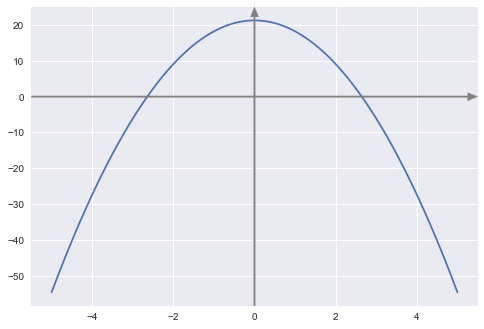

-2.6438064575195312


a_n           b_n           x_n        f(x_n)         error
n                                                                       
0  -4.0000000000  0.0000000000 -2.0000000000  9.1028593611           NaN
1  -4.0000000000 -2.0000000000 -3.0000000000 -6.1144674596  1.0000000000
2  -3.0000000000 -2.0000000000 -2.5000000000  2.2511964988  0.5000000000
3  -3.0000000000 -2.5000000000 -2.7500000000 -1.7426625211  0.2500000000
4  -2.7500000000 -2.5000000000 -2.6250000000  0.3015461811  0.1250000000
5  -2.7500000000 -2.6250000000 -2.6875000000 -0.7087427919  0.0625000000
6  -2.6875000000 -2.6250000000 -2.6562500000 -0.2006439035  0.0312500000
7  -2.6562500000 -2.6250000000 -2.6406250000  0.0511898085  0.0156250000
8  -2.6562500000 -2.6406250000 -2.6484375000 -0.0745423887  0.0078125000
9  -2.6484375000 -2.6406250000 -2.6445312500 -0.0116301243  0.0039062500
10 -2.6445312500 -2.6406250000 -2.6425781250  0.0197913837  0.0019531250
11 -2.6445312500 -2.6425781250 -2.6435546875  0.0040835151  0.0009765625
12 -2.6445312500 -2.6435546875 -2.6440429688 -0.0037725833  0.0004882812
13 -2.6440429688 -2.6435546875 -2.6437988281  0.0001556462  0.0002441406
14 -2.6440429688 -2.6437988281 -2.6439208984 -0.0018084234  0.0001220703
15 -2.6439208984 -2.6437988281 -2.6438598633 -0.0008263773  0.0000610352
16 -2.6438598633 -2.6437988281 -2.6438293457 -0.0003353627  0.0000305176
17 -2.6438293457 -2.6437988281 -2.6438140869 -0.0000898575  0.0000152588
18 -2.6438140869 -2.6437988281 -2.6438064575  0.0000328945  0.0000076294

In [2]:
#### Ejemplo
def f(x):
    return 1.3 * (np.cos(0.2 * x))**2 + 20 - 3 * x**2
graficar(f,-5,5)
tabla, x_n = met_biseccion(f,-4, 0, 1e-5)
print(x_n)
tabla

#### Ejemplo
Utilice el método de bisección para obterner $c_5$, con $f(x)=e^{-x-0.7}-x-0.7$, en el intervalo $[-1, 1]$

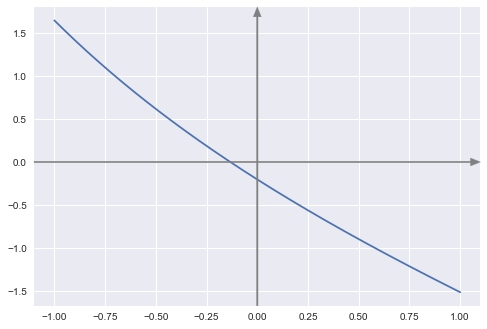

-0.13287353515625


a_n        b_n           x_n        f(x_n)         error
n                                                                    
0  -1.0000000000  1.0000000  0.0000000000 -0.2034146962           NaN
1  -1.0000000000  0.0000000 -0.5000000000  0.6187307531  0.5000000000
2  -0.5000000000  0.0000000 -0.2500000000  0.1876281516  0.2500000000
3  -0.2500000000  0.0000000 -0.1250000000 -0.0122951312  0.1250000000
4  -0.2500000000 -0.1250000 -0.1875000000  0.0864962149  0.0625000000
5  -0.1875000000 -0.1250000 -0.1562500000  0.0368170388  0.0312500000
6  -0.1562500000 -0.1250000 -0.1406250000  0.0121911811  0.0156250000
7  -0.1406250000 -0.1250000 -0.1328125000 -0.0000692822  0.0078125000
8  -0.1406250000 -0.1328125 -0.1367187500  0.0060566057  0.0039062500
9  -0.1367187500 -0.1328125 -0.1347656250  0.0029925780  0.0019531250
10 -0.1347656250 -0.1328125 -0.1337890625  0.0014613772  0.0009765625
11 -0.1337890625 -0.1328125 -0.1333007812  0.0006959799  0.0004882812
12 -0.1333007812 -0.1328125 -0.1330566406  0.0003133319  0.0002441406
13 -0.1330566406 -0.1328125 -0.1329345703  0.0001220206  0.0001220703
14 -0.1329345703 -0.1328125 -0.1328735352  0.0000263682  0.0000610352

In [3]:
def f(x):
    return e**(-x-0.7)-x-0.7
graficar(f,-1,1)
tabla, c_n = met_biseccion(f,-1,1,1e-4,20)
print(c_n)
tabla

#### Ejemplo
Utilice el método de bisección para la función $f(x)=\frac{1}{x}$, con una precisión de $10^{-7}$, en el intervalo $[-1,1]$, ¿qué sucede?

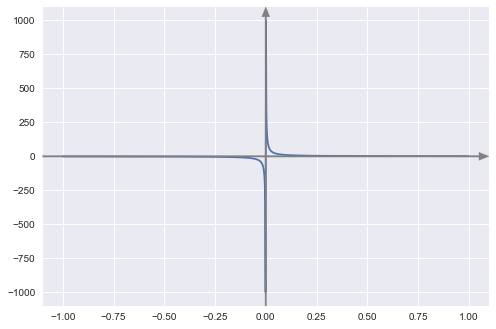

In [4]:
def f(x):
    return 1/x
graficar(f,-1,1)
# met_biseccion(f,-1,1,1e-4) falla porque cunado x = 0, la función no está deficida, es decir, f no es continua en el intervalo

#### Ejemplo
Utilizar el método de la posición falsa para encontrar la raíz de la función, $x \ln(x+1) -2$ en $[0,3]$ con un margen de error de $10^{-6}$

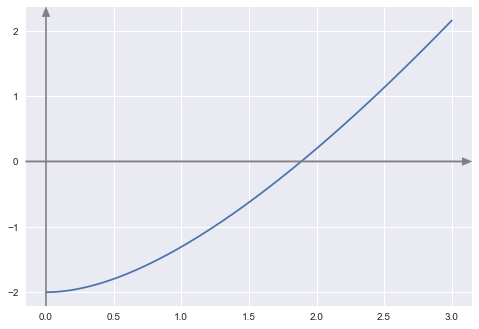

1.886620957115325


a_n  b_n           x_n        f(x_n)     error_abs
n                                                             
0  0.0000000000    3  1.4426950409 -0.7115262389           NaN
1  1.4426950409    3  1.8287247725 -0.0984444352  0.3860297316
2  1.8287247725    3  1.8798053213 -0.0116872494  0.0510805487
3  1.8798053213    3  1.8858369132 -0.0013618478  0.0060315920
4  1.8858369132    3  1.8865392968 -0.0001583424  0.0007023835
5  1.8865392968    3  1.8866209571 -0.0000184059  0.0000816604

In [5]:
def f(x):
    return x * np.log(x + 1) - 2
graficar(f, 0, 3)
tabla, c_n = met_regulafalsi(f, 0, 3, 1e-4)
print(c_n)
tabla

#### Ejemplo

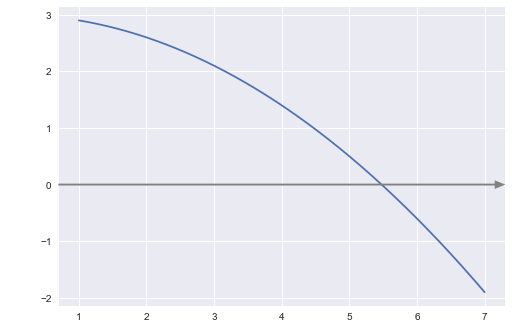

5.477225202358913


a_n  b_n           x_n        f(x_n)     error_abs
n                                                             
0  1.0000000000    7  4.6250000000  0.8609375000           NaN
1  4.6250000000    7  5.3655913978  0.1210428951  0.7405913978
2  5.3655913978    7  5.4634782609  0.0150405293  0.0978868630
3  5.4634782609    7  5.4755459429  0.0018396627  0.0120676821
4  5.4755459429    7  5.4770205579  0.0002245808  0.0014746150
5  5.4770205579    7  5.4772005535  0.0000274097  0.0001799956
6  5.4772005535    7  5.4772225213  0.0000033452  0.0000219678
7  5.4772225213    7  5.4772252024  0.0000004083  0.0000026811

In [6]:
def f(x):
    return -x**2/10 + 3
graficar(f,1,7)
tabla, c_n = met_regulafalsi(f,1,7,1e-5)
print(c_n)
tabla

In [7]:
tabla, c_n = met_biseccion(f,1,7,1e-5)
print(c_n)
tabla

5.47722053527832


a_n           b_n           x_n        f(x_n)         error
n                                                                       
0   1.0000000000  7.0000000000  4.0000000000  1.4000000000           NaN
1   4.0000000000  7.0000000000  5.5000000000 -0.0250000000  1.5000000000
2   4.0000000000  5.5000000000  4.7500000000  0.7437500000  0.7500000000
3   4.7500000000  5.5000000000  5.1250000000  0.3734375000  0.3750000000
4   5.1250000000  5.5000000000  5.3125000000  0.1777343750  0.1875000000
5   5.3125000000  5.5000000000  5.4062500000  0.0772460937  0.0937500000
6   5.4062500000  5.5000000000  5.4531250000  0.0263427734  0.0468750000
7   5.4531250000  5.5000000000  5.4765625000  0.0007263184  0.0234375000
8   5.4765625000  5.5000000000  5.4882812500 -0.0121231079  0.0117187500
9   5.4765625000  5.4882812500  5.4824218750 -0.0056949615  0.0058593750
10  5.4765625000  5.4824218750  5.4794921875 -0.0024834633  0.0029296875
11  5.4765625000  5.4794921875  5.4780273438 -0.0008783579  0.0014648438
12  5.4765625000  5.4780273438  5.4772949219 -0.0000759661  0.0007324219
13  5.4765625000  5.4772949219  5.4769287109  0.0003251895  0.0003662109
14  5.4769287109  5.4772949219  5.4771118164  0.0001246151  0.0001831055
15  5.4771118164  5.4772949219  5.4772033691  0.0000243253  0.0000915527
16  5.4772033691  5.4772949219  5.4772491455 -0.0000258202  0.0000457764
17  5.4772033691  5.4772491455  5.4772262573 -0.0000007474  0.0000228882
18  5.4772033691  5.4772262573  5.4772148132  0.0000117890  0.0000114441
19  5.4772148132  5.4772262573  5.4772205353  0.0000055208  0.0000057220

#### Ejemplo
En este ejemplo miramos que la convergencia del método de la falsa posición no siempre es la mejor.

Sea $f(x) = x^{10} - 1$

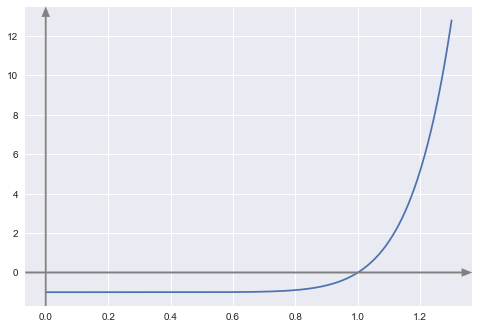

In [8]:
def f(x):
    return x**10 -1
graficar(f, 0, 1.3)

In [9]:
tabla, c_n = met_biseccion(f,0.1,2,1e-14)
print(c_n)
tabla

1.0000000000000058


a_n           b_n           x_n            f(x_n)  \
n                                                                
0   0.1000000000  2.0000000000  1.0500000000  6.2889462678e-01   
1   0.1000000000  1.0500000000  0.5750000000 -9.9604926002e-01   
2   0.5750000000  1.0500000000  0.8125000000 -8.7461843207e-01   
3   0.8125000000  1.0500000000  0.9312500000 -5.0947306733e-01   
4   0.9312500000  1.0500000000  0.9906250000 -8.9892194736e-02   
5   0.9906250000  1.0500000000  1.0203125000  2.2273423737e-01   
6   0.9906250000  1.0203125000  1.0054687500  5.6053140884e-02   
7   0.9906250000  1.0054687500  0.9980468750 -1.9360479644e-02   
8   0.9980468750  1.0054687500  1.0017578125  1.7717824501e-02   
9   0.9980468750  1.0017578125  0.9999023438 -9.7613345830e-04   
10  0.9999023438  1.0017578125  1.0008300781  8.3318563198e-03   
11  0.9999023438  1.0008300781  1.0003662109  3.6681502426e-03   
12  0.9999023438  1.0003662109  1.0001342773  1.3435850963e-03   
13  0.9999023438  1.0001342773  1.0000183105  1.8312055691e-04   
14  0.9999023438  1.0000183105  0.9999603271 -3.9665769603e-04   
15  0.9999603271  1.0000183105  0.9999893188 -1.0680638967e-04   
16  0.9999893188  1.0000183105  1.0000038147  3.8147627501e-05   
17  0.9999893188  1.0000038147  0.9999965668 -3.4331744977e-05   
18  0.9999965668  1.0000038147  1.0000001907  1.9073502717e-06   
19  0.9999965668  1.0000001907  0.9999983788 -1.6212345098e-05   
20  0.9999983788  1.0000001907  0.9999992847 -7.1525343492e-06   
21  0.9999992847  1.0000001907  0.9999997377 -2.6226012730e-06   
22  0.9999997377  1.0000001907  0.9999999642 -3.5762780981e-07   
23  0.9999999642  1.0000001907  1.0000000775  7.7486065497e-07   
24  0.9999999642  1.0000000775  1.0000000209  2.0861627714e-07   
25  0.9999999642  1.0000000209  0.9999999925 -7.4505802417e-08   
26  0.9999999925  1.0000000209  1.0000000067  6.7055227815e-08   
27  0.9999999925  1.0000000067  0.9999999996 -3.7252889662e-09   
28  0.9999999996  1.0000000067  1.0000000032  3.1664968869e-08   
29  0.9999999996  1.0000000032  1.0000000014  1.3969838619e-08   
30  0.9999999996  1.0000000014  1.0000000005  5.1222759367e-09   
31  0.9999999996  1.0000000005  1.0000000001  6.9849459550e-10   
32  0.9999999996  1.0000000001  0.9999999998 -1.5133971853e-09   
33  0.9999999998  1.0000000001  1.0000000000 -4.0745185004e-10   
34  1.0000000000  1.0000000001  1.0000000000  1.4552137273e-10   
35  1.0000000000  1.0000000000  1.0000000000 -1.3096523865e-10   
36  1.0000000000  1.0000000000  1.0000000000  7.2786221494e-12   
37  1.0000000000  1.0000000000  1.0000000000 -6.1843863364e-11   
38  1.0000000000  1.0000000000  1.0000000000 -2.7282620607e-11   
39  1.0000000000  1.0000000000  1.0000000000 -1.0001999229e-11   
40  1.0000000000  1.0000000000  1.0000000000 -1.3611334282e-12   
41  1.0000000000  1.0000000000  1.0000000000  2.9576341376e-12   
42  1.0000000000  1.0000000000  1.0000000000  7.9936057773e-13   
43  1.0000000000  1.0000000000  1.0000000000 -2.8088642523e-13   
44  1.0000000000  1.0000000000  1.0000000000  2.5979218776e-13   
45  1.0000000000  1.0000000000  1.0000000000 -1.1102230246e-14   
46  1.0000000000  1.0000000000  1.0000000000  1.2434497876e-13   
47  1.0000000000  1.0000000000  1.0000000000  5.7731597281e-14   

               error  
n                     
0                NaN  
1   4.7500000000e-01  
2   2.3750000000e-01  
3   1.1875000000e-01  
4   5.9375000000e-02  
5   2.9687500000e-02  
6   1.4843750000e-02  
7   7.4218750000e-03  
8   3.7109375000e-03  
9   1.8554687500e-03  
10  9.2773437500e-04  
11  4.6386718750e-04  
12  2.3193359375e-04  
13  1.1596679687e-04  
14  5.7983398438e-05  
15  2.8991699219e-05  
16  1.4495849609e-05  
17  7.2479248047e-06  
18  3.6239624024e-06  
19  1.8119812012e-06  
20  9.0599060060e-07  
21  4.5299530027e-07  
22  2.2649765014e-07  
23  1.1324882510e-07  
24  5.6624412603e-08  
25  2.8312206246e-08  
26  1.4156103123e-08  
27  7.0780515338e-09  
28  3.5390257391e-09  

In [10]:
tabla, c_n = met_regulafalsi(f,0.1,2,1e-14,1000)
print(c_n)
tabla

0.9974416838697528


a_n  b_n           x_n        f(x_n)     error_abs
n                                                                
0     0.1000000000    2  0.1018554687 -0.9999999999           NaN
1     0.1018554687    2  0.1037091255 -0.9999999999  0.0018536568
2     0.1037091255    2  0.1055609721 -0.9999999998  0.0018518466
3     0.1055609721    2  0.1074110102 -0.9999999998  0.0018500381
4     0.1074110102    2  0.1092592416 -0.9999999998  0.0018482314
...            ...  ...           ...           ...           ...
996   0.9973141108    2  0.9973401198 -0.0262826764  0.0000260090
997   0.9973401198    2  0.9973658792 -0.0260311541  0.0000257594
998   0.9973658792    2  0.9973913915 -0.0257819875  0.0000255123
999   0.9973913915    2  0.9974166590 -0.0255351556  0.0000252674
1000  0.9974166590    2  0.9974416839 -0.0252906375  0.0000250249

[1001 rows x 5 columns]

Ahora, mejoramos la convergencia de los métodos bisección y falsa posición
$f(x) = x^{10} - 1$

In [11]:
def f(x):
    return x**10 -1
tabla, c_n = met_regulafalsi_mod(f,0,1.3,1e-10,2)
print(c_n)
tabla

0.9999999999998991


a_n           b_n           x_n            f(x_n)  \
n                                                                
0   0.0000000000  1.3000000000  0.0942995954 -9.9999999994e-01   
1   0.0942995954  1.3000000000  0.1817588725 -9.9999996065e-01   
2   0.1817588725  1.3000000000  0.2628740125 -9.9999842429e-01   
3   0.7408794363  1.3000000000  0.7795558900 -9.1711564306e-01   
4   0.7795558900  1.3000000000  0.8143883106 -8.7167380608e-01   
5   0.7795558900  1.0397779450  0.9507316910 -3.9663556691e-01   
6   0.9507316910  1.0397779450  0.9911551864 -8.5009514375e-02   
7   0.9911551864  1.0397779450  0.9985087254 -1.4813067169e-02   
8   0.9911551864  1.0154665657  0.9993924564 -6.0588526493e-03   
9   0.9911551864  1.0033108760  0.9998669098 -1.3301048342e-03   
10  0.9998669098  1.0033108760  0.9999980286 -1.9713450459e-05   
11  0.9999980286  1.0033108760  0.9999999708 -2.9193333029e-07   
12  0.9999980286  1.0016544523  0.9999999854 -1.4632435297e-07   
13  0.9999980286  1.0008262405  0.9999999927 -7.3186158023e-08   
14  0.9999999927  1.0008262405  1.0000000000 -2.7170043992e-10   
15  1.0000000000  1.0008262405  1.0000000000 -1.0091927294e-12   

               error  
n                     
0                NaN  
1   8.7459277147e-02  
2   8.1115140001e-02  
3   5.1668187747e-01  
4   3.4832420620e-02  
5   1.3634338037e-01  
6   4.0423495379e-02  
7   7.3535390753e-03  
8   8.8373100440e-04  
9   4.7445340453e-04  
10  1.3111880106e-04  
11  1.9421691971e-06  
12  1.4560900596e-08  
13  7.3138202161e-09  
14  7.2914460025e-09  
15  2.7069124720e-11

#### Ejemplo
En este ejemplo probamos el método de Newton-Rapshon.
Encontrar la raíz de la función $f(x) = x^{10} - 1$

In [12]:
def f(x):
    return x**10 - 1
def df(x):
    return 10 * x**9
tabla, c_n = met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

1.0


x_n-1             x_n            f(x_n)       error_abs
n                                                                   
1     0.4000000000  381.8297265625  6.5871471421e+25  381.4297265625
2   381.8297265625  343.6467539062  2.2967961902e+25   38.1829726562
3   343.6467539062  309.2820785156  8.0084331283e+24   34.3646753906
4   309.2820785156  278.3538706641  2.7923679708e+24   30.9282078516
5   278.3538706641  250.5184835977  9.7363850825e+23   27.8353870664
..             ...             ...               ...             ...
58    1.0823273539    1.0231596733  2.5728619174e-01    0.0591676805
59    1.0231596733    1.0022221288  2.2444813756e-02    0.0209375445
60    1.0022221288    1.0000220405  2.2042693574e-04    0.0022000883
61    1.0000220405    1.0000000022  2.1858513000e-08    0.0000220383
62    1.0000000022    1.0000000000  0.0000000000e+00    0.0000000022

[62 rows x 4 columns]

#### Ejercicios de la cartilla
2. (b) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$$3x^2 + \ln(x)(2x+\ln(x)) = 2x^2$, en $(0,1]$$

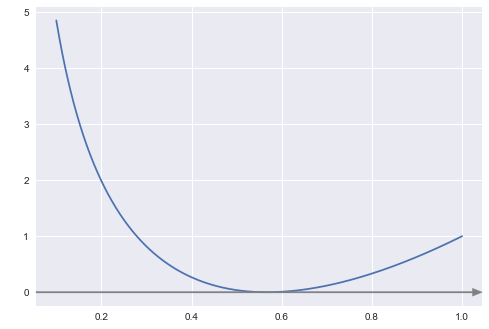

In [13]:
def f(x):
    return x**2 + np.log(x)*(2*x+np.log(x))
def df(x):
    return (2*(x+1)*(x+np.log(x)))/x
graficar(f,0.1,1)

In [14]:
tabla , c_n = met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

0.5671432889718685


x_n-1           x_n            f(x_n)     error_abs
n                                                             
1   0.4000000000  0.4737558188  7.4696946544e-02  0.0737558188
2   0.4737558188  0.5176847315  1.9797648563e-02  0.0439289126
3   0.5176847315  0.5416819331  5.0971540673e-03  0.0239972016
4   0.5416819331  0.5542244141  1.2932065025e-03  0.0125424810
5   0.5542244141  0.5606361536  3.2569412668e-04  0.0064117395
6   0.5606361536  0.5638777162  8.1724313830e-05  0.0032415625
7   0.5638777162  0.5655074917  2.0468783181e-05  0.0016297755
8   0.5655074917  0.5663246369  5.1219155534e-06  0.0008171452
9   0.5663246369  0.5667337749  1.2810692743e-06  0.0004091381
10  0.5667337749  0.5669384855  3.2034114283e-07  0.0002047105
11  0.5669384855  0.5670408761  8.0094515353e-08  0.0001023907
12  0.5670408761  0.5670920803  2.0024782665e-08  0.0000512042
13  0.5670920803  0.5671176846  5.0063398982e-09  0.0000256043
14  0.5671176846  0.5671304873  1.2516029879e-09  0.0000128027
15  0.5671304873  0.5671368888  3.1290303681e-10  0.0000064015
16  0.5671368888  0.5671400896  7.8225981248e-11  0.0000032008
17  0.5671400896  0.5671416900  1.9556578579e-11  0.0000016004
18  0.5671416900  0.5671424902  4.8891446447e-12  0.0000008002
19  0.5671424902  0.5671428903  1.2223000390e-12  0.0000004001
20  0.5671428903  0.5671430904  3.0558888753e-13  0.0000002001
21  0.5671430904  0.5671431904  7.6383344094e-14  0.0000001000
22  0.5671431904  0.5671432404  1.9095836024e-14  0.0000000500
23  0.5671432404  0.5671432654  4.7739590059e-15  0.0000000250
24  0.5671432654  0.5671432779  1.1657341759e-15  0.0000000125
25  0.5671432779  0.5671432840  2.7755575616e-16  0.0000000061
26  0.5671432840  0.5671432869  1.1102230246e-16  0.0000000029
27  0.5671432869  0.5671432890  0.0000000000e+00  0.0000000021

#### Ejemplos

In [15]:
def f(x):
    return x**(2) + np.log(x)*(2*x+np.log(x))
tabla, c_n = met_secante(f, 0.2, 0.4, 1e-10)
print(c_n)
tabla

0.5671432883882624


x_n            f(x_n)         error
n                                               
0   0.2000000000  1.9865152290e+00           NaN
1   0.4000000000  2.6655611982e-01           NaN
2   0.4309956345  1.6864301795e-01  0.0309956345
3   0.4843817213  5.7840385376e-02  0.0533860868
4   0.5122499385  2.4552593898e-02  0.0278682172
5   0.5328051328  9.3691546149e-03  0.0205551942
6   0.5454890043  3.6703758378e-03  0.0126838715
7   0.5536582239  1.4099636773e-03  0.0081692196
8   0.5587538888  5.4253051014e-04  0.0050956649
9   0.5619409398  2.0786673370e-04  0.0031870509
10  0.5639204844  7.9593843749e-05  0.0019795446
11  0.5651487998  3.0441927430e-05  0.0012283154
12  0.5659095491  1.1638139365e-05  0.0007607493
13  0.5663803961  4.4476811036e-06  0.0004708470
14  0.5666716400  1.6994283344e-06  0.0002912439
15  0.5668517355  6.4925438115e-07  0.0001800956
16  0.5669630770  2.4802435683e-07  0.0001113414
17  0.5670319038  9.4744188939e-08  0.0000688268
18  0.5670744464  3.6190796082e-08  0.0000425426
19  0.5671007412  1.3824062506e-08  0.0000262948
20  0.5671169931  5.2804186579e-09  0.0000162519
21  0.5671270376  2.0169632631e-09  0.0000100445
22  0.5671332455  7.7041673041e-10  0.0000062080
23  0.5671370823  2.9427438264e-10  0.0000038368
24  0.5671394536  1.1240303133e-10  0.0000023713
25  0.5671409191  4.2934267253e-11  0.0000014655
26  0.5671418249  1.6399437364e-11  0.0000009058
27  0.5671423847  6.2639893272e-12  0.0000005598
28  0.5671427306  2.3926416404e-12  0.0000003460
29  0.5671429444  9.1393559387e-13  0.0000002138
30  0.5671430766  3.4905411894e-13  0.0000001322
31  0.5671431583  1.3339329641e-13  0.0000000817
32  0.5671432088  5.0903725679e-14  0.0000000505
33  0.5671432399  1.9484414082e-14  0.0000000312
34  0.5671432593  7.3829831138e-15  0.0000000193
35  0.5671432711  2.8865798640e-15  0.0000000118
36  0.5671432786  1.0547118734e-15  0.0000000076
37  0.5671432830  3.8857805862e-16  0.0000000044
38  0.5671432855  1.6653345369e-16  0.0000000025
39  0.5671432874  5.5511151231e-17  0.0000000019
40  0.5671432884  0.0000000000e+00  0.0000000010

In [16]:
def f(x):
    return x- 0.5*np.tan(x)
tabla, c_n = met_secante(f, 1.2, 1, 1e-5)
tabla

x_n            f(x_n)         error
n                                              
0  1.2000000000 -8.6075811063e-02           NaN
1  1.0000000000  2.2129613767e-01           NaN
2  1.1439924096  4.4507368058e-02  0.1439924096
3  1.1802431465 -3.4228365758e-02  0.0362507369
4  1.1644840569  2.3793866069e-03  0.0157590896
5  1.1655083472  1.1712435594e-04  0.0010242903
6  1.1655613779 -4.2725296012e-07  0.0000530307
7  1.1655611852  7.6365802570e-11  0.0000001927

### Ejercicio libro
Utilice el método de Newton-Rapshon para encontrar la raíz de $f(x) = e^{-0.5x} (4-x) - 2$

Utilice conjeturas iniciales de a) 2, b) 6 y c) 8.

Explique sus resultados.

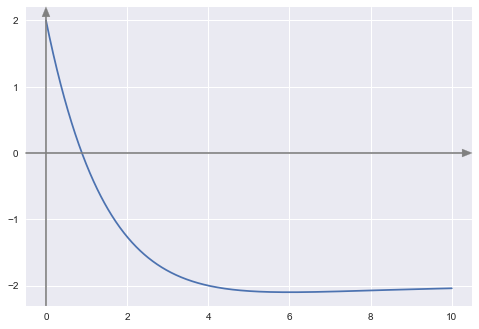

In [17]:
def f(x):
    return e**(-0.5*x) * (4 - x) -2
def df(x):
    return -0.5 * e**(-0.5*x) * (4 - x) - e**(-0.5*x)
graficar(f, 0, 10)

In [18]:
tabla , c_n = met_newton_rapshon(f, df, 2, 1e-10)
print(c_n)
tabla

0.885708802004777


x_n-1           x_n            f(x_n)         error_abs
n                                                                
1  2.0000000000  0.2817181715  1.2297431106e+00  1.7182818285e+00
2  0.2817181715  0.7768868450  1.8563037542e-01  4.9516867350e-01
3  0.7768868450  0.8817078789  6.5794683306e-03  1.0482103388e-01
4  0.8817078789  0.8857032412  9.1320299567e-06  3.9953622381e-03
5  0.8857032412  0.8857088020  1.7659651519e-11  5.5608273787e-06
6  0.8857088020  0.8857088020  4.4408920985e-16  1.0753620217e-11

In [19]:
tabla , c_n = met_newton_rapshon(f, df, 6, 1e-10)
print(c_n)
tabla

El metodo de falló.
None


In [20]:
df(6)

0.0

El método falla porque x = 6 es un mínimo y la recta tangente tiene pendiente horizontal.

In [21]:
tabla , c_n = met_newton_rapshon(f, df, 8, 1e-10)
print(c_n)
tabla

El metodo de falló.
None


In [22]:
df(8)
8 - (f(8))/(df(8))
121.19630006628846 - (f(121.19630006628846))/(df(121.19630006628846))
df(7.212131452880089e+24)

0.0

#### Ejercicios de la cartilla
2. (a) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$$4x^2 - 4 x e^{-2x} + e^{-4x}, \ \ \ \ \mbox{en}\ [0,1]$$

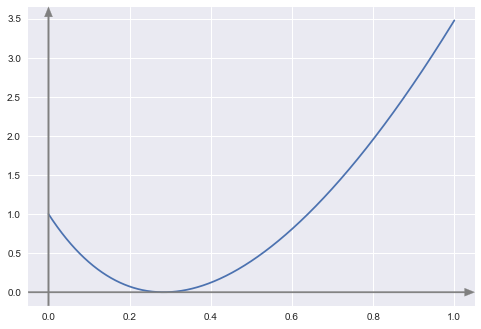

In [23]:
def f(x):
    return 4*x**2-4*x*e**(-2*x)+e**(-4*x)
def df(x):
    return 8*x-4*(e**(-2*x)-2*e**(-2*x)*x)-4*e**(-4*x)
graficar(f,0,1)

In [24]:
tabla , c_n = met_newton_rapshon(f, df, 0, 1e-7)
print(c_n)
tabla

0.28357155953963165


x_n-1           x_n            f(x_n)     error_abs
n                                                             
1   0.0000000000  0.1250000000  2.7963026818e-01  0.1250000000
2   0.1250000000  0.1993198435  7.4306848065e-02  0.0743198435
3   0.1993198435  0.2400970577  1.9173711771e-02  0.0407772142
4   0.2400970577  0.2614834037  4.8709967423e-03  0.0213863460
5   0.2614834037  0.2724380604  1.2276262277e-03  0.0109546566
6   0.2724380604  0.2779822713  3.0815233932e-04  0.0055442109
7   0.2779822713  0.2807712860  7.7194498662e-05  0.0027890147
8   0.2807712860  0.2821700442  1.9318219379e-05  0.0013987582
9   0.2821700442  0.2828704889  4.8320068639e-06  0.0007004447
10  0.2828704889  0.2832209781  1.2083083856e-06  0.0003504891
11  0.2832209781  0.2833962894  3.0211544055e-07  0.0001753113
12  0.2833962894  0.2834839617  7.5533653887e-08  0.0000876723
13  0.2834839617  0.2835278021  1.8884012687e-08  0.0000438403
14  0.2835278021  0.2835497233  4.7210781395e-09  0.0000219212
15  0.2835497233  0.2835606842  1.1802788746e-09  0.0000109609
16  0.2835606842  0.2835661647  2.9507080113e-10  0.0000054805
17  0.2835661647  0.2835689049  7.3767936204e-11  0.0000027403
18  0.2835689049  0.2835702751  1.8441914662e-11  0.0000013701
19  0.2835702751  0.2835709601  4.6104786655e-12  0.0000006851
20  0.2835709601  0.2835713027  1.1527445665e-12  0.0000003425
21  0.2835713027  0.2835714739  2.8799185259e-13  0.0000001713
22  0.2835714739  0.2835715595  7.2108985449e-14  0.0000000856

#### Ejercicios de la cartilla
2. (c) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$$e^{-2} x^2 + 2 e^{-1} x = 1, \ \ \ \ \mbox{en}\ [-4,2]$$

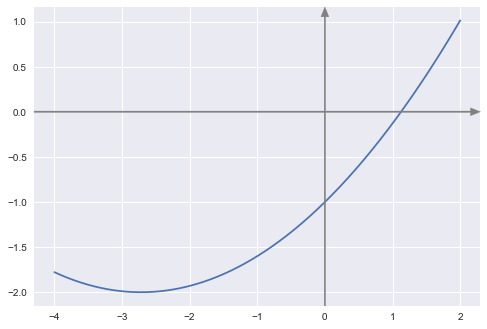

In [25]:
def f(x):
     return (((e**-2)*x**2)+(2*e**-1)*x)-1
def df(x):
     return ((2*x)/(e**2)+(2/e))
graficar(f,-4,2)

In [26]:
tabla , c_n = met_newton_rapshon(f, df, 0, 1e-7)
print(c_n)
tabla

1.1259491997000715


x_n-1           x_n            f(x_n)         error_abs
n                                                                
1  0.0000000000  1.3591409142  2.5000000000e-01  1.3591409142e+00
2  1.3591409142  1.1326174285  6.9444444444e-03  2.2652348570e-01
3  1.1326174285  1.1259549731  6.0073048829e-06  6.6624554619e-03
4  1.1259549731  1.1259491997  4.5108361491e-12  5.7733582861e-06
5  1.1259491997  1.1259491997  0.0000000000e+00  4.3351988666e-12

#### Ejercicios de la cartilla
2. (d) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.
$$x^2 \cos^2(x) + \cos^2(x)-2x^3 \cos(x) -2x \cos(x) + x^4 +x^2, \ \ \ \ \mbox{en}\ [-1,1]$$

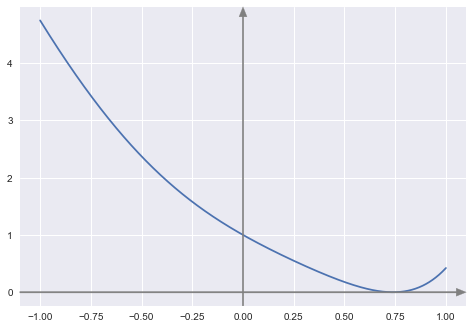

In [27]:
def f(x):
    return (x**2)*np.cos(x)**2+np.cos(x)**2-2*x**3*np.cos(x)-2*x*np.cos(x)+x**4+x**2
def df(x):
    return 2*(x-np.cos(x))*(2*x**2+(x**2+1)*np.sin(x)-x*np.cos(x)+1)
graficar (f,-1,1)

In [28]:
tabla , c_n = met_newton_rapshon(f, df, -1, 1e-7)
print(c_n)
tabla

0.7390850338486695


x_n-1           x_n            f(x_n)     error_abs
n                                                             
1  -1.0000000000 -0.1707035647  1.3756787182e+00  0.8292964353
2  -0.1707035647  0.3949932151  3.2228705520e-01  0.5656967798
3   0.3949932151  0.6141936388  5.6779470220e-02  0.2192004237
4   0.6141936388  0.6825243965  1.2803369140e-02  0.0683307576
5   0.6825243965  0.7119650154  3.0670136320e-03  0.0294406189
6   0.7119650154  0.7257868078  7.5181603670e-04  0.0138217924
7   0.7257868078  0.7324983231  1.8618338147e-04  0.0067115152
8   0.7324983231  0.7358069557  4.6330143108e-05  0.0033086326
9   0.7358069557  0.7374498077  1.1555912856e-05  0.0016428520
10  0.7374498077  0.7382684059  2.8856712361e-06  0.0008185982
11  0.7382684059  0.7386770027  7.2100573123e-07  0.0004085969
12  0.7386770027  0.7388811262  1.8020000392e-07  0.0002041234
13  0.7388811262  0.7389831442  4.5043577424e-08  0.0001020181
14  0.7389831442  0.7390341424  1.1260091526e-08  0.0000509981
15  0.7390341424  0.7390596387  2.8149225173e-09  0.0000254963
16  0.7390596387  0.7390723862  7.0371819483e-10  0.0000127475
17  0.7390723862  0.7390787598  1.7592793888e-10  0.0000063736
18  0.7390787598  0.7390819465  4.3981818187e-11  0.0000031867
19  0.7390819465  0.7390835399  1.0995537814e-11  0.0000015934
20  0.7390835399  0.7390843365  2.7489122090e-12  0.0000007967
21  0.7390843365  0.7390847349  6.8722805224e-13  0.0000003984
22  0.7390847349  0.7390849341  1.7208456882e-13  0.0000001992
23  0.7390849341  0.7390850338  4.2743586448e-14  0.0000000998

#### Ejercicios de la cartilla
3. (a) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$\tan^{-1}(x) = 0, \ \ \ p_0 = 1.39174520027073$$

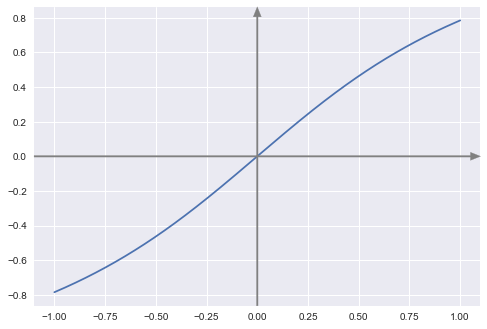

6.617444900424222e-24


x_n-1               x_n            f(x_n)     error_abs
n                                                                 
1   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
2  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
3   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
4  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
5   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
6  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
7   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
8  -1.3917452003  1.3917452003e+00  9.4774713351e-01  2.7834904005
9   1.3917452003 -1.3917452002e+00 -9.4774713351e-01  2.7834904005
10 -1.3917452002  1.3917452002e+00  9.4774713349e-01  2.7834904004
11  1.3917452002 -1.3917452001e+00 -9.4774713345e-01  2.7834904003
12 -1.3917452001  1.3917451997e+00  9.4774713333e-01  2.7834903998
13  1.3917451997 -1.3917451988e+00 -9.4774713302e-01  2.7834903985
14 -1.3917451988  1.3917451964e+00  9.4774713220e-01  2.7834903952
15  1.3917451964 -1.3917451900e+00 -9.4774713003e-01  2.7834903864
16 -1.3917451900  1.3917451733e+00  9.4774712433e-01  2.7834903633
17  1.3917451733 -1.3917451291e+00 -9.4774710927e-01  2.7834903023
18 -1.3917451291  1.3917450124e+00  9.4774706955e-01  2.7834901415
19  1.3917450124 -1.3917447047e+00 -9.4774696476e-01  2.7834897171
20 -1.3917447047  1.3917438928e+00  9.4774668834e-01  2.7834885975
21  1.3917438928 -1.3917417511e+00 -9.4774595912e-01  2.7834856439
22 -1.3917417511  1.3917361013e+00  9.4774403541e-01  2.7834778524
23  1.3917361013 -1.3917211969e+00 -9.4773896055e-01  2.7834572982
24 -1.3917211969  1.3916818792e+00  9.4772557274e-01  2.7834030761
25  1.3916818792 -1.3915781620e+00 -9.4769025437e-01  2.7832600412
26 -1.3915781620  1.3913045855e+00  9.4759707782e-01  2.7828827475
27  1.3913045855 -1.3905831147e+00 -9.4735123846e-01  2.7818877002
28 -1.3905831147  1.3886814858e+00  9.4670245694e-01  2.7792646005
29  1.3886814858 -1.3836763250e+00 -9.4498923416e-01  2.7723578108
30 -1.3836763250  1.3705516603e+00  9.4045789338e-01  2.7542279853
31  1.3705516603 -1.3364734878e+00 -9.2842397177e-01  2.7070251480
32 -1.3364734878  1.2502655299e+00  8.9615899257e-01  2.5867390176
33  1.2502655299 -1.0467368442e+00 -8.0822900440e-01  2.2970023741
34 -1.0467368442  6.4703475170e-01  5.7428786228e-01  1.6937715959
35  0.6470347517 -1.6768100400e-01 -1.6613543759e-01  0.8147157557
36 -0.1676810040  3.1256502546e-03  3.1256400758e-03  0.1708066543
37  0.0031256503 -2.0357715233e-08 -2.0357715233e-08  0.0031256706
38 -0.0000000204  6.6174449004e-24  6.6174449004e-24  0.0000000204

In [29]:
def f(x):
    return np.arctan(x)
def df(x):
    return 1/(1+x**2)
graficar (f,-1,1)
tabla , c_n = met_newton_rapshon(f, df, 1.39174520027073, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
3. (b) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$-x^4+6x^2+11, \ \ \ p_0 = 1$$

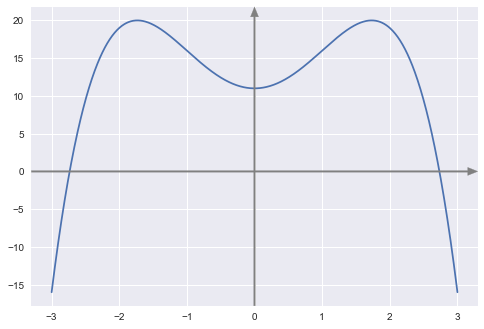

1.0


x_n-1  x_n  f(x_n)  error_abs
n                                 
1      1.0 -1.0    16.0        2.0
2     -1.0  1.0    16.0        2.0
3      1.0 -1.0    16.0        2.0
4     -1.0  1.0    16.0        2.0
5      1.0 -1.0    16.0        2.0
..     ...  ...     ...        ...
96    -1.0  1.0    16.0        2.0
97     1.0 -1.0    16.0        2.0
98    -1.0  1.0    16.0        2.0
99     1.0 -1.0    16.0        2.0
100   -1.0  1.0    16.0        2.0

[100 rows x 4 columns]

In [30]:
def f(x):
    return -x**4 + 6*x**2+11
def df(x):
    return -4*x**3 + 12*x
graficar (f,-3,3)
tabla , c_n = met_newton_rapshon(f, df, 1, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
3. (x) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$1 - 2e^{-x^2}, \ \ \ p_0 = 0.83255461$$

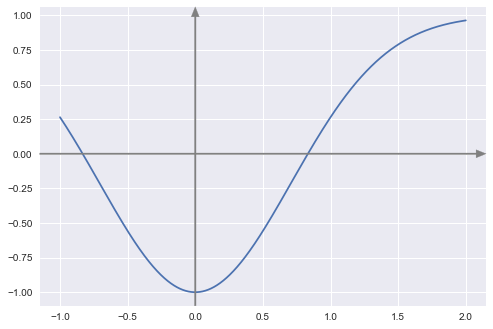

0.8325546111576978


x_n-1           x_n  f(x_n)     error_abs
n                                                
1  0.83255461  0.8325546112     0.0  0.0000000012

In [31]:
def f(x):
    return 1-2*e**(-x**2)
def df(x):
    return 4*e**(-x**2)*x
graficar(f, -1,2)
tabla , c_n = met_newton_rapshon(f, df, 0.83255461, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
6. Sea $f(x) = \ln(x)$, $p_0 = 2.8$ y $p_1 = 2.64$; utilice el método de la secante para aproximar un cero de la función con una precisión $10^{-4}$ y compare con el resultado de aplicar el método de Newton, con punto inicial $p_0 = 2.8$.

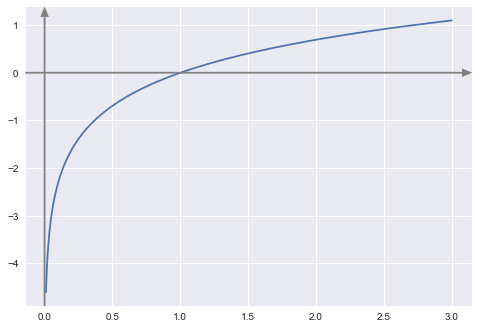

1.0000000000000093


x_n            f(x_n)         error
n                                               
0   2.8000000000  1.0296194172e+00           NaN
1   2.6400000000  9.7077891716e-01           NaN
2   0.0002429163 -8.3227937113e+00  2.6397570837
3   2.3642588372  8.6046458474e-01  2.3640159209
4   2.1427522747  7.6209111237e-01  0.2215065625
5   0.4267593496 -8.5153500868e-01  1.7159929251
6   1.3323148753  2.8691793706e-01  0.9055555257
7   1.1040927742  9.9023978901e-02  0.2282221011
8   0.9838150348 -1.6317372358e-02  0.1202777394
9   1.0008307593  8.3041444298e-04  0.0170157245
10  1.0000067403  6.7402355405e-06  0.0008240191
11  0.9999999972 -2.7993756241e-09  0.0000067431
12  1.0000000000  9.3258734069e-15  0.0000000028

In [32]:
def f(x):
    return np.log(x)
def df(x):
    return 1/x
graficar(f, 0.01,3)
tabla , c_n = met_secante(f, 2.8, 2.64, 1e-7)
print(c_n)
tabla

In [33]:
tabla , c_n = met_newton_rapshon(f, df, 2.8, 1e-7)
print(c_n)
tabla

-0.08293436810724275


<ipython-input-32-5747f8cbe281>:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)


x_n-1           x_n  f(x_n)     error_abs
n                                           
1    2.8 -0.0829343681     NaN  2.8829343681

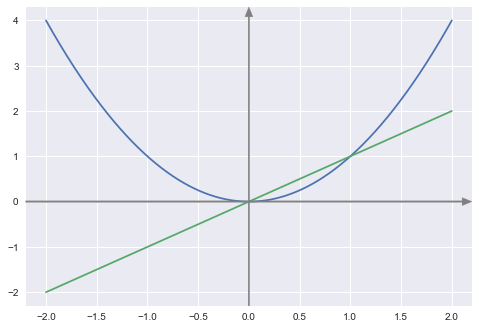

In [56]:
def g(x):
    return x**2
graficar_pf(g, -2, 2)

In [54]:
# uselo bajo su responsabilidad
def met_punto_fijo(f, x_0, tol, N=100):
    if f(x_0) == x_0:
        print("La solucion exacta fue encontrada: x_n={0:.16f}".format(x_0))
        return None, x_0
    n = 1
    x_n = f(x_0)    
    error = abs(x_0 - x_n)
    #agrega los primeros datos a la lista
    lista=[[0, x_0, None], [1, x_n, error]]
    while error > tol and n < N and f(x_n) != x_n:        
        # Validar cuando fallo
        x_0 = x_n        
        x_n = f(x_0)
        error = abs(x_0 - x_n)
        n += 1
        lista.append([n, x_n, error])
    tabla = pd.DataFrame(lista, columns=['n','x_n', 'error']).set_index('n')
    return tabla, x_n

In [57]:
tabla, x = met_punto_fijo(g, 0.99999, 1e-8)
print(x)
tabla

6.085245376868913e-19


x_n         error
n                                 
0   9.9999000000e-01           NaN
1   9.9998000010e-01  0.0000099999
2   9.9996000060e-01  0.0000199995
3   9.9992000280e-01  0.0000399978
4   9.9984001200e-01  0.0000799908
5   9.9968004960e-01  0.0001599624
6   9.9936020156e-01  0.0003198480
7   9.9872081246e-01  0.0006393891
8   9.9744326124e-01  0.0012775512
9   9.9489305939e-01  0.0025502018
10  9.8981219962e-01  0.0050808598
11  9.7972819052e-01  0.0100840091
12  9.5986732730e-01  0.0198608632
13  9.2134528602e-01  0.0385220413
14  8.4887713606e-01  0.0724681500
15  7.2059239213e-01  0.1282847439
16  5.1925339560e-01  0.2013389965
17  2.6962408884e-01  0.2496293068
18  7.2697149283e-02  0.1969269396
19  5.2848755139e-03  0.0674122738
20  2.7929909197e-05  0.0052569456
21  7.8007982777e-10  0.0000279291
22  6.0852453769e-19  0.0000000008

1.a Solucionar la ecuación utilizando el método de punto fijo con una presición de $\epsilon = 10^{-8}$
$$x - e^{-x} = 0$$

primero se debe plantear una ecuación semejante para punto fijo:
$$x = e^{-x}$$
entonces $g(x) = e^{-x}$

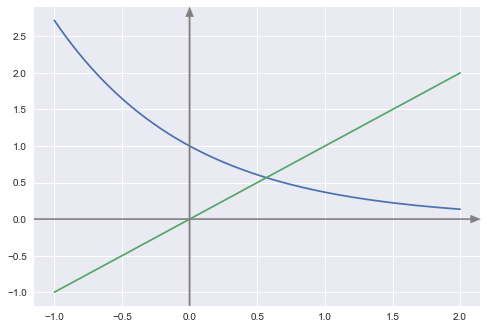

In [62]:
def g(x):
    return e**(-x)
graficar_pf(g, -1, 2)

In [65]:
tabla, x = met_punto_fijo(g, 0.5, 1e-8)
print(x)
tabla

0.5671432876111684


x_n         error
n                             
0   0.5000000000           NaN
1   0.6065306597  0.1065306597
2   0.5452392119  0.0612914478
3   0.5797030949  0.0344638830
4   0.5600646279  0.0196384669
5   0.5711721490  0.0111075210
6   0.5648629470  0.0063092020
7   0.5684380476  0.0035751006
8   0.5664094527  0.0020285948
9   0.5675596343  0.0011501815
10  0.5669072129  0.0006524213
11  0.5672771960  0.0003699830
12  0.5670673519  0.0002098441
13  0.5671863601  0.0001190082
14  0.5671188643  0.0000674958
15  0.5671571437  0.0000382795
16  0.5671354337  0.0000217100
17  0.5671477463  0.0000123127
18  0.5671407633  0.0000069831
19  0.5671447237  0.0000039604
20  0.5671424776  0.0000022461
21  0.5671437514  0.0000012739
22  0.5671430290  0.0000007225
23  0.5671434387  0.0000004097
24  0.5671432063  0.0000002324
25  0.5671433381  0.0000001318
26  0.5671432634  0.0000000747
27  0.5671433058  0.0000000424
28  0.5671432817  0.0000000240
29  0.5671432953  0.0000000136
30  0.5671432876  0.0000000077

1.e Solucionar la ecuación utilizando el método de punto fijo con una presición de $\epsilon = 10^{-8}$
$$x^3 - x - 10 = 0$$

primero se debe plantear una ecuación semejante para punto fijo:
$$x = x^3 - 10$$
entonces $g(x) = x^3 -10$

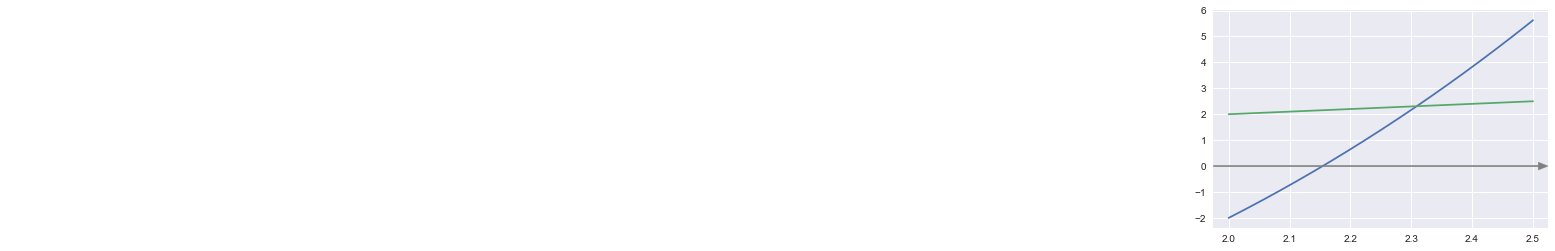

In [70]:
def g1(x):
    return x**3 - 10
graficar_pf(g1, 2, 2.5)

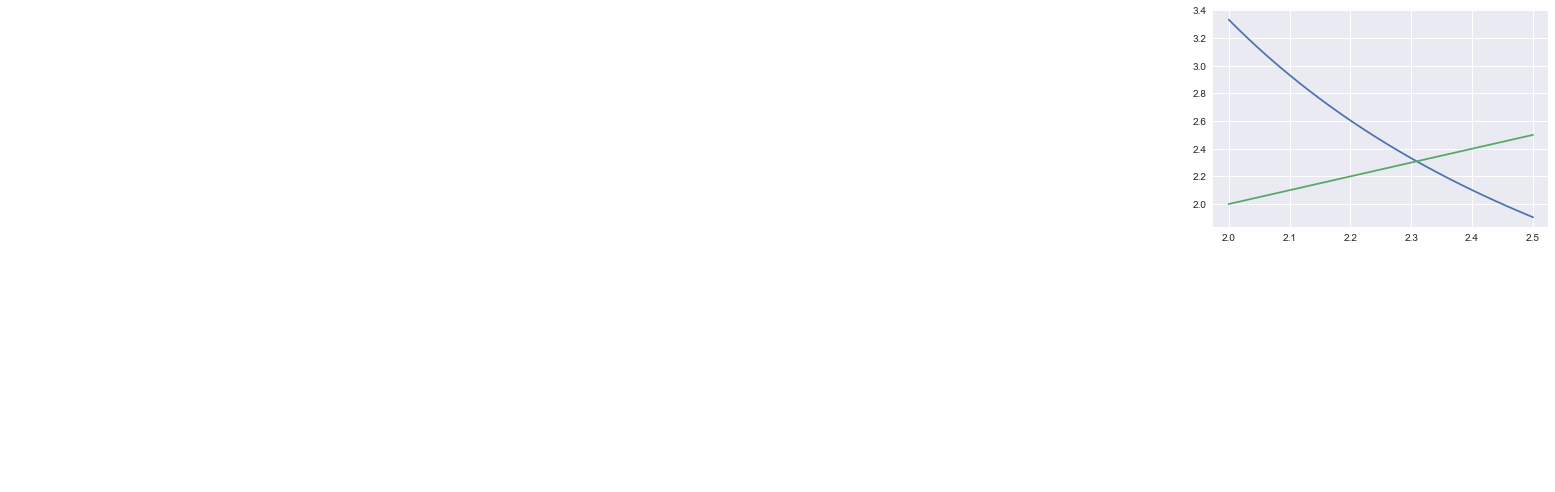

In [71]:
def g2(x):
    return 10 / (x**2 -1)
graficar_pf(g2, 2, 2.5)

In [74]:
tabla, x= met_punto_fijo(g2, 2.3, 1e-8,20)
tabla

x_n           error
n                                 
0     2.3000000000             NaN
1     2.3310023310    0.0310023310
2     2.2555177405    0.0754845905
3     2.4465668111    0.1910490706
4     2.0057407667    0.4408260444
5     3.3079765649    1.3022357983
6     1.0057621163    2.3022144486
7   865.2439120583  864.2381499420
8     0.0000133574  865.2438987009
9   -10.0000000018   10.0000133592
10    0.1010101010   10.1010101028
11  -10.1030821564   10.2040922574
12    0.0989391066   10.2020212630
13  -10.0988571757   10.1977962823
14    0.0990227286   10.1978799043
15  -10.0990260074   10.1980487360
16    0.0990193850   10.1980453924
17  -10.0990192538   10.1980386388
18    0.0990195187   10.1980387726
19  -10.0990195240   10.1980390427
20    0.0990195134   10.1980390374

In [75]:
10 / (1.0057621163**2 - 1)

865.2439195826029